## Observations and Insights 

In [1]:
#%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer" )

# Display the data table for preview
combined_df.head()
len(combined_df)


1893

In [2]:
# Checking the number of mice.
mice_number = combined_df["Mouse ID"].unique()
total_mice = len(mice_number)
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data_groups = combined_df.groupby(combined_df.columns.tolist())
size = data_groups.size().reset_index() 
size[size[0] > 1]   


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,0
586,g989,Propriva,Female,21,26,0,45.0,0,2


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.loc[combined_df["Mouse ID"] != "g989", :]

#cleaned_df.head()
len(cleaned_df)

1880

In [6]:

#cleaned_df = combined_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep="last")
#cleaned_df.head(100)
#print(len(cleaned_df))

In [7]:
# Checking the number of mice in the clean DataFrame.
mice_number = cleaned_df["Mouse ID"].unique()
total_mice = len(mice_number)
total_mice

248

In [8]:
cleaned_df.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

grouped_df = cleaned_df.groupby(["Drug Regimen"])

mean = grouped_df["Tumor Volume (mm3)"].mean()
median = grouped_df["Tumor Volume (mm3)"].median()
variance = grouped_df["Tumor Volume (mm3)"].var()
std = grouped_df["Tumor Volume (mm3)"].std()
sem = grouped_df["Tumor Volume (mm3)"].sem()

In [10]:
summary_df = pd.DataFrame({"Mean" : mean,
                          "Median" : median,
                          "Variance" : variance,
                          "Standard Deviation" : std,
                          "SEM" : sem})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Bar and Pie Charts

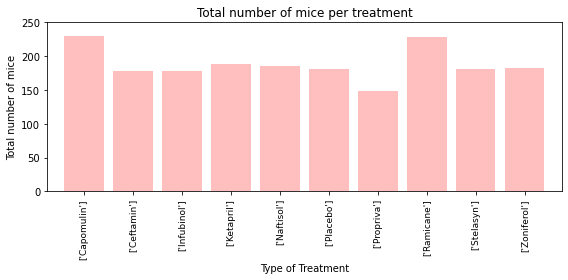

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot. 
x_axis = np.arange(10)

mice_count = grouped_df["Mouse ID"].count()
#mice_count = grouped_df["Mouse ID"].unique().count()
#print(mice_count)
treatment_name = grouped_df["Drug Regimen"].unique()

plt.figure(figsize=(8,4))
plt.bar(x_axis, mice_count, color = "r", alpha = 0.25, align = "center")

tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, grouped_df["Drug Regimen"].unique(), rotation="vertical" )

plt.tick_params(axis='x', labelsize=9)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_count)+20)

plt.xlabel("Type of Treatment")
plt.ylabel("Total number of mice")
plt.title("Total number of mice per treatment")
plt.tight_layout()
plt.show()


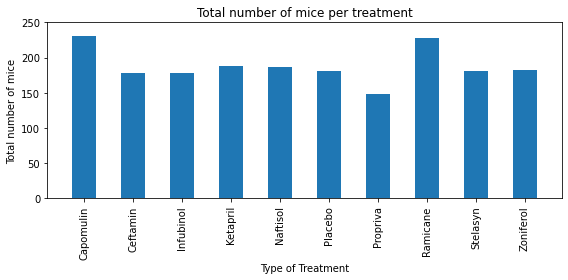

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
mice_count.plot(kind="bar", figsize = (8,4))

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_count)+20)

plt.xlabel("Type of Treatment")
plt.ylabel("Total number of mice")
plt.title("Total number of mice per treatment")
plt.tight_layout()
plt.show()


In [14]:
#---count mice only once
#new_df = cleaned_df.loc[cleaned_df["Mouse ID", "Drug Regimen"]]

Text(0.5, 1.0, 'Distribution of female versus male')

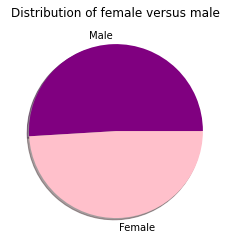

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender=["Male", "Female"]

total_male = cleaned_df.loc[cleaned_df["Sex"]=="Male",:]
total_female = cleaned_df.loc[cleaned_df["Sex"]=="Female",:]
gender_total = [len(total_male), len(total_female)]
colors = ["Purple", "Pink"]
plt.pie(gender_total, labels = gender, colors = colors, shadow = True, startangle = 0)
plt.title("Distribution of female versus male")

#per_male = round(len(total_male) / len(cleaned_df) * 100, 2)
#per_female = round(len(total_female) / len(cleaned_df) * 100, 2)


In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [18]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
